In [621]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
collateral = 250
credit = 12
profit_chance_call = 0.953
profit_chance_put = 0.958

max_profit = credit 
max_profit_per = max_profit/collateral
max_loss = collateral - credit
max_loss_per = max_loss/collateral

profit_chance = profit_chance_call*profit_chance_put

In [23]:
n_iterations = 50

In [ ]:
dice_rolls = np.random.uniform(0,1, size=n_iterations)

(array([3., 1., 3., 4., 3., 2., 2., 2., 0., 2., 1., 6., 3., 3., 2., 2., 3.,
        4., 2., 2.]),
 array([0.00844873, 0.05750602, 0.1065633 , 0.15562059, 0.20467788,
        0.25373517, 0.30279245, 0.35184974, 0.40090703, 0.44996432,
        0.4990216 , 0.54807889, 0.59713618, 0.64619347, 0.69525075,
        0.74430804, 0.79336533, 0.84242262, 0.89147991, 0.94053719,
        0.98959448]),
 <BarContainer object of 20 artists>)

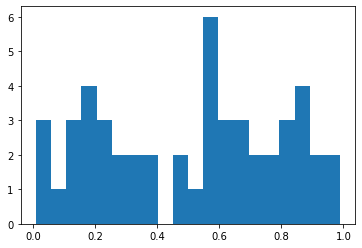

In [19]:
plt.hist(dice_rolls, bins=20)

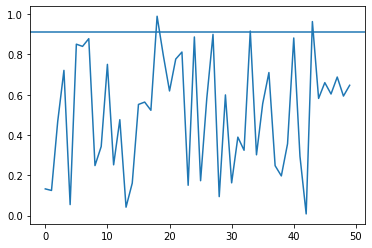

In [20]:
plt.plot(dice_rolls)
plt.axhline(profit_chance)

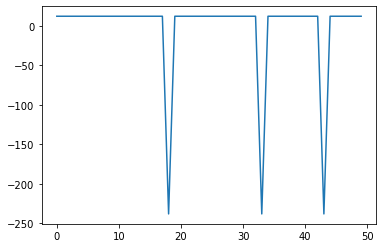

In [21]:
profit = np.zeros((n_iterations))
for day, dice_roll in enumerate(dice_rolls):
    if dice_roll > profit_chance:
        profit[day] = -max_loss
    else:
        profit[day] = credit
plt.plot(profit)

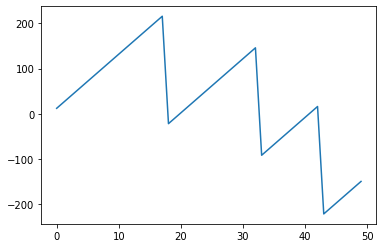

In [22]:
plt.plot(np.cumsum(profit))

In [28]:
def realization(n_iterations, profit_chance, max_loss, credit, plot=False):
    dice_rolls = np.random.uniform(0,1, size=n_iterations)
    profit = np.zeros((n_iterations))
    for day, dice_roll in enumerate(dice_rolls):
        if dice_roll > profit_chance:
            profit[day] = -max_loss
        else:
            profit[day] = credit
            
    if plot:
        plt.hist(dice_rolls, bins=20)
        plt.figure()
        plt.plot(dice_rolls)
        plt.axhline(profit_chance)
        plt.figure()
        plt.plot(profit)
        plt.figure()
        plt.plot(np.cumsum(profit))
    
    return profit

In [34]:
n_iterations=1000

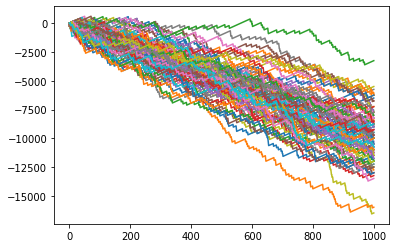

In [36]:
plt.figure()
for i in range(100):
    plt.plot(np.cumsum(realization(n_iterations, profit_chance, max_loss, credit, plot=False)))

In [51]:
profit_chance = 0.91
credit = 30

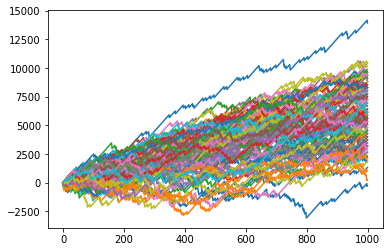

In [52]:
plt.figure()
n_realizations = 100
realizations = np.zeros((n_realizations, n_iterations))
for r in range(n_realizations):
    realizations[r] = np.cumsum(realization(n_iterations, profit_chance, max_loss, credit, plot=False))
    plt.plot(realizations[r])

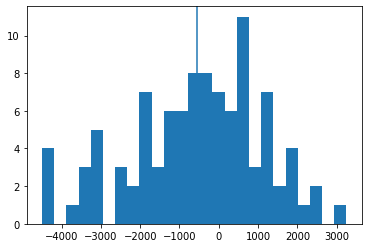

In [46]:
plt.hist(realizations[:,-1], bins=25)
plt.axvline(np.mean(realizations[:,-1]))

In [695]:
def get_realizations(n_realizations = 10000, n_iterations=1000, profit_chance=0.92, collateral=250, credit=20):
    max_loss = collateral - credit
    plt.figure()
    realizations = np.zeros((n_realizations, n_iterations))
    for r in range(n_realizations):
        realizations[r] = np.cumsum(realization(n_iterations, profit_chance, max_loss, credit))
        if r % 100 == 0:
            print(r, end='\r')
            plt.plot(realizations[r])
    plt.figure()
    plt.hist(realizations[:,-1], bins=25)
    plt.axvline(np.mean(realizations[:,-1]),c='r')
    return realizations

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


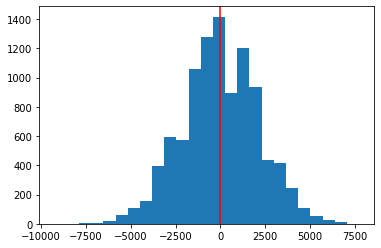

In [66]:
realizations = get_realizations(n_realizations = 10000, n_iterations=1000)

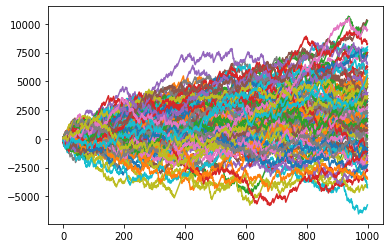

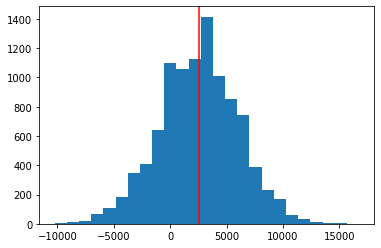

In [76]:
realizations = get_realizations(n_realizations = 10000, n_iterations=1000, profit_chance=0.73, credit=70)

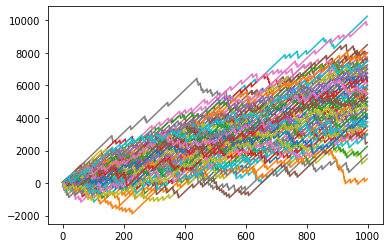

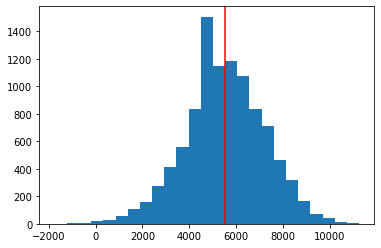

In [78]:
realizations = get_realizations(n_realizations = 10000, n_iterations=1000, profit_chance=0.95, credit=18)

In [79]:
IV_hist = [15.5, 12.8, 12.9, 17.5, 32.6, 31.5, 22.5, 24.2, 17.8, 14.2, 14.1, 16.7, 15.8, 11.1]
RV_hist = [11.1, 10.2, 9.5, 15.8, 35.3, 23.5, 16.3, 20.9, 12.6, 10.9, 11.0, 14.9, 11.2, 6.7]

In [80]:
IV_hist = np.array(IV_hist)
RV_hist = np.array(RV_hist)

In [81]:
over_estimation = IV_hist/RV_hist
over_estimation

array([1.3963964 , 1.25490196, 1.35789474, 1.10759494, 0.92351275,
       1.34042553, 1.3803681 , 1.15789474, 1.41269841, 1.30275229,
       1.28181818, 1.12080537, 1.41071429, 1.65671642])

In [82]:
np.mean(over_estimation)

1.2931781504550262

In [87]:
0.90**2

0.81

In [88]:
from scipy import signal
from scipy.fftpack import fft, fftshift
import matplotlib.pyplot as plt

/Users/dodkins/.conda/envs/stocks/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


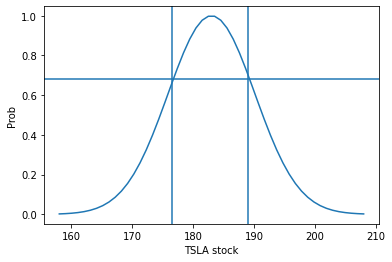

In [131]:
mean = 183
std = 7
n = 50
window = signal.gaussian(n, std=std)
plt.plot(np.linspace(mean-n//2, mean+n//2,len(window)), window)
plt.ylabel("Prob")
plt.xlabel("TSLA stock")
plt.axhline(0.68)
plt.axvline(176.5)
plt.axvline(189)

In [132]:
189-176.5

12.5

In [104]:
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt 
  
## generate the data and plot it for an ideal normal curve
  
## x-axis for the plot
x_data = np.linspace(mean-n//2, mean+n//2,len(window))
  
IV = 61
underlying = 183
std = IV/100. * underlying

## y-axis as the gaussian
y_data = stats.norm.pdf(x_data, underlying, std)
y_data /= y_data.max()

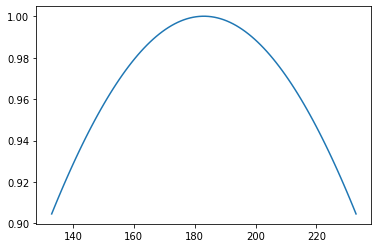

In [105]:
plt.plot(x_data, y_data)

In [209]:
stats.norm.pdf(210, 183, std)

0.005800537619076572

In [109]:
def f(x, a, b, c):
    return a * np.exp(-(x - b)**2.0 / (2 * c**2))

In [117]:
f(210, 1., 183., std)

0.9711729988539135

In [118]:
std

111.63

In [137]:
IV = 61
underlying = 183
std = IV/100. * underlying

In [138]:
x_data = np.linspace(mean-n//2, mean+n//2,len(window))

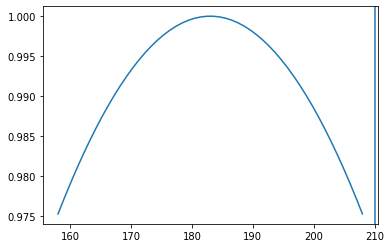

In [139]:
plt.plot(x_data, f(x_data, 1., 183., std))
plt.axvline(210)

In [676]:
IV = 62
underlying = 183
std = IV/100. * underlying
std *= np.sqrt(7/365.)
# std /= 2.35
std

15.71250276097664

In [204]:
f(210.4, 1., 183., std)

0.21860717225743792

In [283]:
# std = 17

In [677]:
std

15.71250276097664

In [678]:
stock_price = np.arange(115,245,0.1)
AUC = f(stock_price, 1., 183., std)
AUC_tot = np.sum(AUC)
cdf = np.cumsum(AUC)/AUC_tot
prob = cdf[np.where(stock_price >= 210.4)[0][0]]
prob

0.9602703029422668

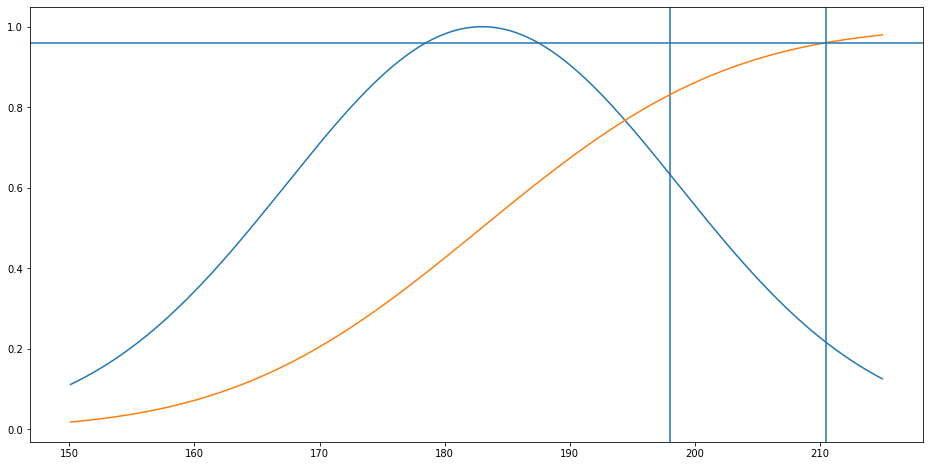

In [304]:
plt.figure(figsize=(16,8))
plt.plot(stock_price[np.logical_and(stock_price>150, stock_price<215)], f(stock_price[np.logical_and(stock_price>150, stock_price<215)], 1., 183., std))
plt.axvline(198)
plt.plot(stock_price[np.logical_and(stock_price>150, stock_price<215)], cdf[np.logical_and(stock_price>150, stock_price<215)])
plt.axvline(210.5)
plt.axhline(cdf[np.where(stock_price >= 210.4)[0][0]])

In [305]:
cdf[np.where(stock_price >= 210.4)[0][0]]

0.9602703029422668

In [312]:
from scipy.special import erf

In [313]:
import math
def lognorm(x,mu=0,sigma=1):
    a = (np.log(x) - mu)/np.sqrt(2*sigma**2)
    p = 0.5 + 0.5*erf(a)
    return p

In [326]:
def lognorm(x,mu=0,sigma=1):
    a = np.exp(-((np.log(x) - mu)**2)/np.sqrt(2*sigma**2))/(x*sigma*np.sqrt(2*3.14159))
    return a

In [314]:
lognorm(stock_price)

array([0.99999896, 0.99999896, 0.99999897, ..., 0.99999998, 0.99999998,
       0.99999998])

In [327]:
lognorm(stock_price)

array([4.22876201e-10, 4.20051446e-10, 4.17247545e-10, ...,
       8.36786309e-13, 8.33790362e-13, 8.30806163e-13])

In [319]:
std

15.71250276097664

In [328]:
np.log(stock_price)

array([4.74493213, 4.74580132, 4.74666975, ..., 5.50003297, 5.50044155,
       5.50084996])

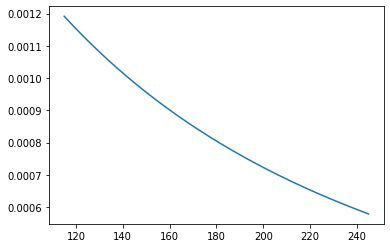

In [333]:
plt.plot(stock_price, lognorm(stock_price, np.log(183), np.log(std)))

In [335]:
stock_price = np.arange(0,2.5,0.025)

/var/folders/1x/4jypbkmx6rz03t2116nn6_g00000gn/T/ipykernel_70083/2128331683.py:2: RuntimeWarning: divide by zero encountered in log
  a = np.exp(-((np.log(x) - mu)**2)/np.sqrt(2*sigma**2))/(x*sigma*np.sqrt(2*3.14159))
/var/folders/1x/4jypbkmx6rz03t2116nn6_g00000gn/T/ipykernel_70083/2128331683.py:2: RuntimeWarning: invalid value encountered in divide
  a = np.exp(-((np.log(x) - mu)**2)/np.sqrt(2*sigma**2))/(x*sigma*np.sqrt(2*3.14159))


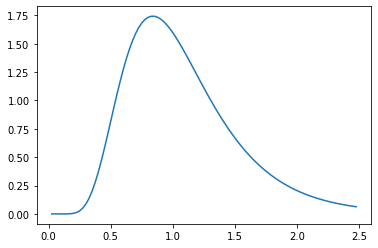

In [337]:
plt.plot(stock_price, lognorm(stock_price, 0, 0.25))

In [338]:
stock_price = np.arange(115,245,5)

In [339]:
stock_price = np.log(stock_price)

In [340]:
stock_price

array([4.74493213, 4.78749174, 4.82831374, 4.86753445, 4.90527478,
       4.94164242, 4.97673374, 5.01063529, 5.04342512, 5.07517382,
       5.10594547, 5.13579844, 5.16478597, 5.19295685, 5.22035583,
       5.24702407, 5.27299956, 5.29831737, 5.32300998, 5.34710753,
       5.37063803, 5.39362755, 5.4161004 , 5.43807931, 5.45958551,
       5.48063892])

In [354]:
np.log(183)

5.209486152841421

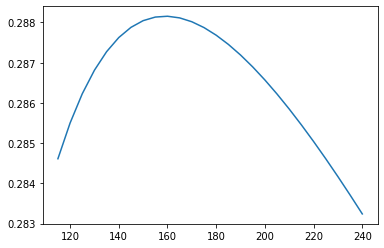

In [357]:
plt.plot(np.exp(stock_price), lognorm(stock_price, 1.8, 0.25))

In [360]:
np.log(15.7)

2.7536607123542622

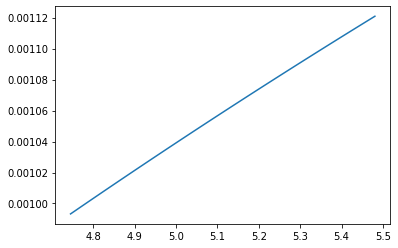

In [361]:
plt.plot(stock_price, lognorm(stock_price, np.log(183), np.log(15.7)))

In [395]:
stock_price = np.arange(115,245,0.1)

In [379]:
np.log10(stock_price)

array([2.06069784, 2.06107532, 2.06145248, ..., 2.38863397, 2.38881141,
       2.38898879])

In [384]:
stock_price = np.logspace(2.1,2.5,50)

In [392]:
stock_price - np.roll(stock_price, 1)

array([-190.33522484,    2.38873309,    2.43405782,    2.48024257,
          2.52730363,    2.57525766,    2.62412158,    2.67391266,
          2.7246485 ,    2.77634702,    2.82902649,    2.88270552,
          2.93740307,    2.99313848,    3.04993143,    3.10780199,
          3.16677061,    3.22685812,    3.28808576,    3.35047515,
          3.41404835,    3.4788278 ,    3.54483641,    3.61209749,
          3.6806348 ,    3.75047257,    3.82163547,    3.89414863,
          3.9680377 ,    4.04332876,    4.12004842,    4.19822379,
          4.27788249,    4.35905266,    4.44176299,    4.5260427 ,
          4.61192156,    4.69942991,    4.78859869,    4.87945939,
          4.97204411,    5.06638557,    5.1625171 ,    5.26047267,
          5.36028689,    5.46199502,    5.56563299,    5.67123744,
          5.77884566,    5.88849568])

In [431]:
def f(x, a, b, c):
    return a * np.exp(-(x - b)**2.0 / (2 * c**2))

In [400]:
std, np.log(std)

(15.71250276097664, 2.754456749634832)

In [410]:
factor_scale = 183*np.linspace(0.7,1.3,20)

In [411]:
factor_scale

array([128.1       , 133.87894737, 139.65789474, 145.43684211,
       151.21578947, 156.99473684, 162.77368421, 168.55263158,
       174.33157895, 180.11052632, 185.88947368, 191.66842105,
       197.44736842, 203.22631579, 209.00526316, 214.78421053,
       220.56315789, 226.34210526, 232.12105263, 237.9       ])

In [421]:
factor_scale = np.array([183*1.05**i for i in range(-10,10)])
factor_scale

array([112.3461254 , 117.96343167, 123.86160325, 130.05468341,
       136.55741758, 143.38528846, 150.55455289, 158.08228053,
       165.98639456, 174.28571429, 183.        , 192.15      ,
       201.7575    , 211.845375  , 222.43764375, 233.55952594,
       245.23750223, 257.49937735, 270.37434621, 283.89306352])

In [422]:
factor_scale - np.roll(factor_scale, 1)

array([-171.54693813,    5.61730627,    5.89817158,    6.19308016,
          6.50273417,    6.82787088,    7.16926442,    7.52772764,
          7.90411403,    8.29931973,    8.71428571,    9.15      ,
          9.6075    ,   10.087875  ,   10.59226875,   11.12188219,
         11.6779763 ,   12.26187511,   12.87496887,   13.51871731])

In [424]:
def log_f(x, a, b, c):
    return a * np.exp(-(x/b)**2.0 / (2 * c**2))

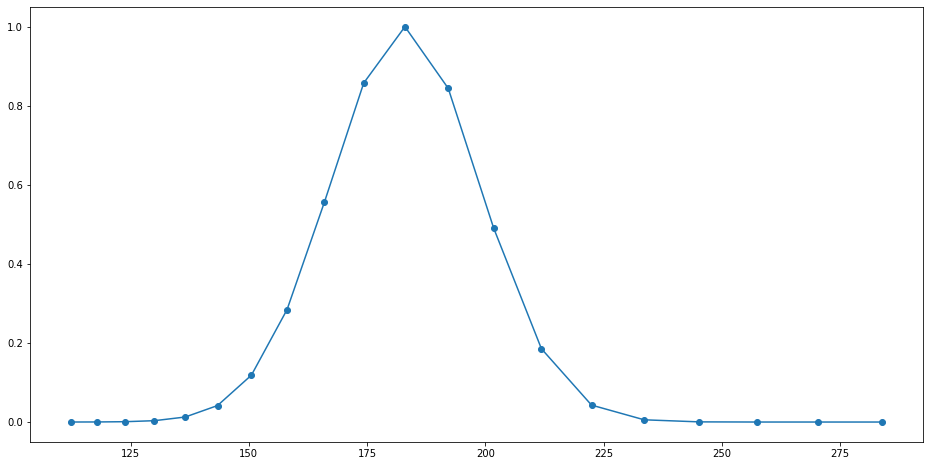

In [432]:
plt.figure(figsize=(16,8))
# plt.plot(stock_price, f(np.log(stock_price), 1., np.log(183.), np.log(std)))#, marker='o')
# plt.plot(stock_price, f(np.log(stock_price), 1., np.log(183.), std))#, marker='o')
# plt.plot(factor_scale, log_f(factor_scale, 1., 183., std), marker='o')
plt.plot(factor_scale, f(factor_scale, 1., 183., std), marker='o')
# plt.xscale('log')
# plt.axvline(198)
# plt.plot(stock_price, cdf)
# plt.axvline(210.5)
# plt.axhline(cdf[np.where(stock_price >= 210.4)[0][0]])

In [442]:
factor_scale = np.array([1*1.05**i for i in range(-15,15)])
factor_scale

array([0.4810171 , 0.50506795, 0.53032135, 0.55683742, 0.58467929,
       0.61391325, 0.64460892, 0.67683936, 0.71068133, 0.7462154 ,
       0.78352617, 0.82270247, 0.8638376 , 0.90702948, 0.95238095,
       1.        , 1.05      , 1.1025    , 1.157625  , 1.21550625,
       1.27628156, 1.34009564, 1.40710042, 1.47745544, 1.55132822,
       1.62889463, 1.71033936, 1.79585633, 1.88564914, 1.9799316 ])

In [443]:
factor_scale * 183

array([ 88.02612895,  92.4274354 ,  97.04880717, 101.90124753,
       106.9963099 , 112.3461254 , 117.96343167, 123.86160325,
       130.05468341, 136.55741758, 143.38528846, 150.55455289,
       158.08228053, 165.98639456, 174.28571429, 183.        ,
       192.15      , 201.7575    , 211.845375  , 222.43764375,
       233.55952594, 245.23750223, 257.49937735, 270.37434621,
       283.89306352, 298.0877167 , 312.99210254, 328.64170766,
       345.07379305, 362.3274827 ])

In [447]:
factor_scale* 183 - np.roll(factor_scale* 183, 1)

array([-274.30135375,    4.40130645,    4.62137177,    4.85244036,
          5.09506238,    5.3498155 ,    5.61730627,    5.89817158,
          6.19308016,    6.50273417,    6.82787088,    7.16926442,
          7.52772764,    7.90411403,    8.29931973,    8.71428571,
          9.15      ,    9.6075    ,   10.087875  ,   10.59226875,
         11.12188219,   11.6779763 ,   12.26187511,   12.87496887,
         13.51871731,   14.19465318,   14.90438584,   15.64960513,
         16.43208538,   17.25368965])

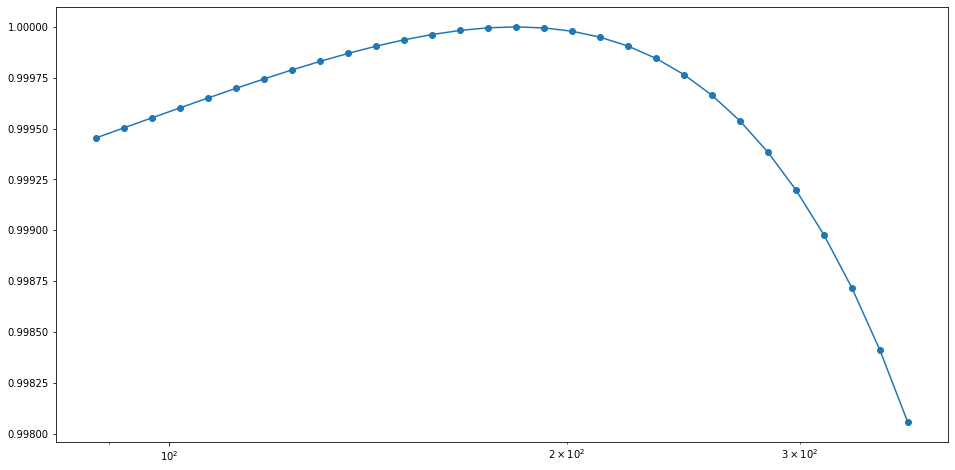

In [448]:
plt.figure(figsize=(16,8))
plt.plot(factor_scale * 183, f(factor_scale, 1., 1., std), marker='o')
plt.xscale('log')

In [450]:
np.log(factor_scale* 183) - np.log(np.roll(factor_scale* 183, 1))

array([-1.41491476,  0.04879016,  0.04879016,  0.04879016,  0.04879016,
        0.04879016,  0.04879016,  0.04879016,  0.04879016,  0.04879016,
        0.04879016,  0.04879016,  0.04879016,  0.04879016,  0.04879016,
        0.04879016,  0.04879016,  0.04879016,  0.04879016,  0.04879016,
        0.04879016,  0.04879016,  0.04879016,  0.04879016,  0.04879016,
        0.04879016,  0.04879016,  0.04879016,  0.04879016,  0.04879016])

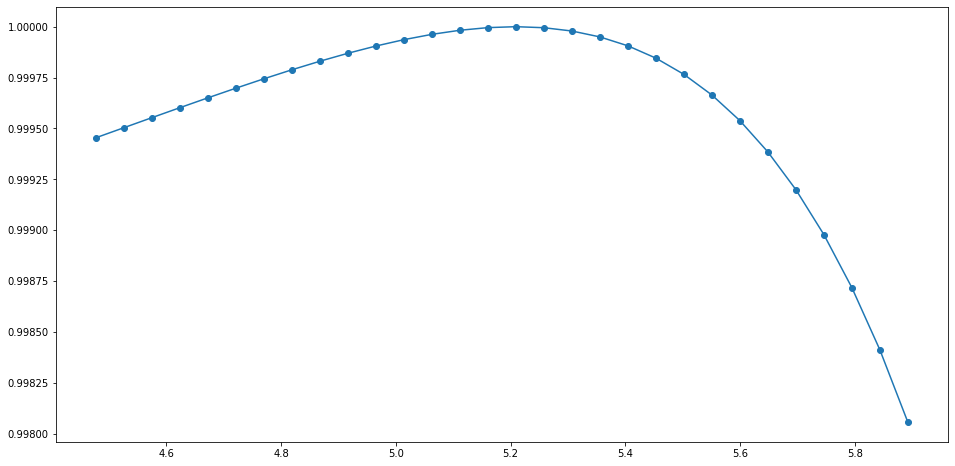

In [454]:
plt.figure(figsize=(16,8))
plt.plot(np.log(factor_scale * 183), f(factor_scale, 1., 1., std), marker='o')
# plt.xscale('log')

In [490]:
factor_scale = np.array([1*1.05**i for i in range(15,-15,-1)])
factor_scale

array([2.07892818, 1.9799316 , 1.88564914, 1.79585633, 1.71033936,
       1.62889463, 1.55132822, 1.47745544, 1.40710042, 1.34009564,
       1.27628156, 1.21550625, 1.157625  , 1.1025    , 1.05      ,
       1.        , 0.95238095, 0.90702948, 0.8638376 , 0.82270247,
       0.78352617, 0.7462154 , 0.71068133, 0.67683936, 0.64460892,
       0.61391325, 0.58467929, 0.55683742, 0.53032135, 0.50506795])

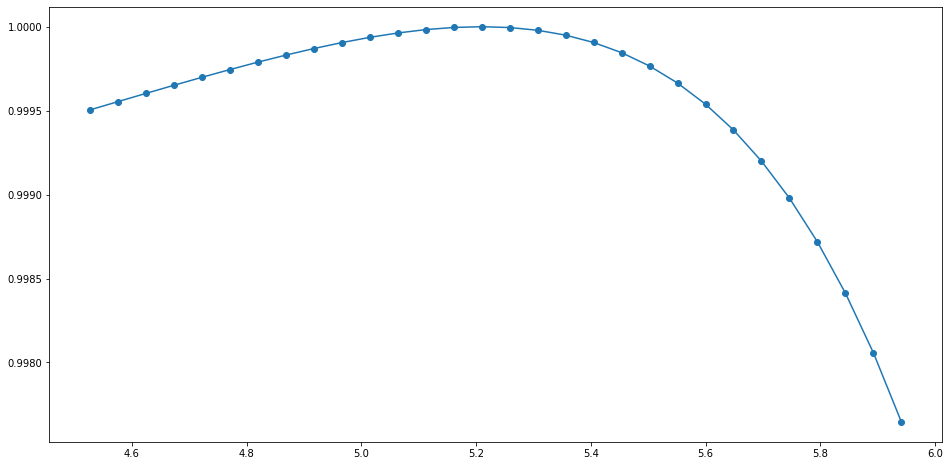

In [491]:
plt.figure(figsize=(16,8))
plt.plot(np.log(factor_scale * 183), f(factor_scale, 1., 1., std), marker='o')
# plt.xscale('log')

In [ ]:
#this ^ is th result of factor scale exponentially increasing. what if the series was logarithmically decreasing. that may get the skew th correct way  

In [472]:
factor_scale = np.array([1*1.05**i for i in range(-15,15,1)])
factor_scale

array([0.4810171 , 0.50506795, 0.53032135, 0.55683742, 0.58467929,
       0.61391325, 0.64460892, 0.67683936, 0.71068133, 0.7462154 ,
       0.78352617, 0.82270247, 0.8638376 , 0.90702948, 0.95238095,
       1.        , 1.05      , 1.1025    , 1.157625  , 1.21550625,
       1.27628156, 1.34009564, 1.40710042, 1.47745544, 1.55132822,
       1.62889463, 1.71033936, 1.79585633, 1.88564914, 1.9799316 ])

In [473]:
factor_scale - np.roll(factor_scale, 1)

array([-1.4989145 ,  0.02405085,  0.0252534 ,  0.02651607,  0.02784187,
        0.02923396,  0.03069566,  0.03223045,  0.03384197,  0.03553407,
        0.03731077,  0.03917631,  0.04113512,  0.04319188,  0.04535147,
        0.04761905,  0.05      ,  0.0525    ,  0.055125  ,  0.05788125,
        0.06077531,  0.06381408,  0.06700478,  0.07035502,  0.07387277,
        0.07756641,  0.08144473,  0.08551697,  0.08979282,  0.09428246])

In [463]:
factor_scale = np.array([np.log(1.05) / np.log(i) for i in range(15,-15,-1)])
factor_scale

/var/folders/1x/4jypbkmx6rz03t2116nn6_g00000gn/T/ipykernel_70083/3802928997.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  factor_scale = np.array([np.log(1.05) / np.log(i) for i in range(15,-15,-1)])
/var/folders/1x/4jypbkmx6rz03t2116nn6_g00000gn/T/ipykernel_70083/3802928997.py:1: RuntimeWarning: divide by zero encountered in log
  factor_scale = np.array([np.log(1.05) / np.log(i) for i in range(15,-15,-1)])
/var/folders/1x/4jypbkmx6rz03t2116nn6_g00000gn/T/ipykernel_70083/3802928997.py:1: RuntimeWarning: invalid value encountered in log
  factor_scale = np.array([np.log(1.05) / np.log(i) for i in range(15,-15,-1)])


array([ 0.01801671,  0.01848772,  0.01902188,  0.01963461,  0.02034708,
        0.0211893 ,  0.02220536,  0.02346311,  0.02507318,  0.02723031,
        0.03031503,  0.03519466,  0.04441072,  0.07038933,         inf,
       -0.        ,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan])

In [487]:
factor_scale = np.array([math.log(100,i) for i in range(32,2,-1)])
factor_scale

array([1.32877124, 1.3410563 , 1.35398499, 1.36761675, 1.38201907,
       1.39726885, 1.41345418, 1.43067656, 1.44905355, 1.46872227,
       1.48984372, 1.51260839, 1.53724357, 1.56402297, 1.59327954,
       1.62542302, 1.66096405, 1.70054831, 1.74500574, 1.79542344,
       1.85325682, 1.92050514, 2.        , 2.09590327, 2.21461873,
       2.36658932, 2.57019442, 2.86135312, 3.32192809, 4.19180655])

In [488]:
factor_scale - np.roll(factor_scale, 1)

array([-2.86303531,  0.01228507,  0.01292868,  0.01363177,  0.01440232,
        0.01524978,  0.01618534,  0.01722237,  0.01837699,  0.01966872,
        0.02112145,  0.02276467,  0.02463518,  0.02677939,  0.02925657,
        0.03214348,  0.03554103,  0.03958426,  0.04445743,  0.0504177 ,
        0.05783338,  0.06724832,  0.07949486,  0.09590327,  0.11871546,
        0.15197059,  0.20360509,  0.2911587 ,  0.46057498,  0.86987845])

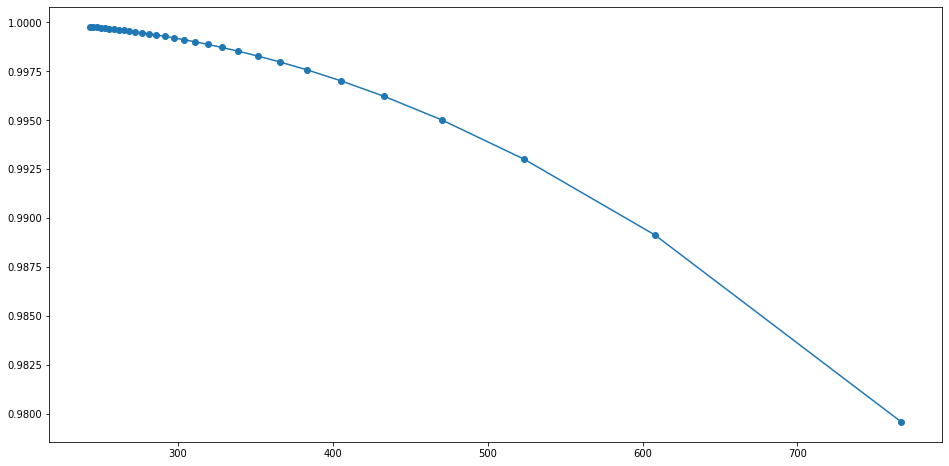

In [489]:
plt.figure(figsize=(16,8))
plt.plot(factor_scale * 183, f(factor_scale, 1., 1., std), marker='o')

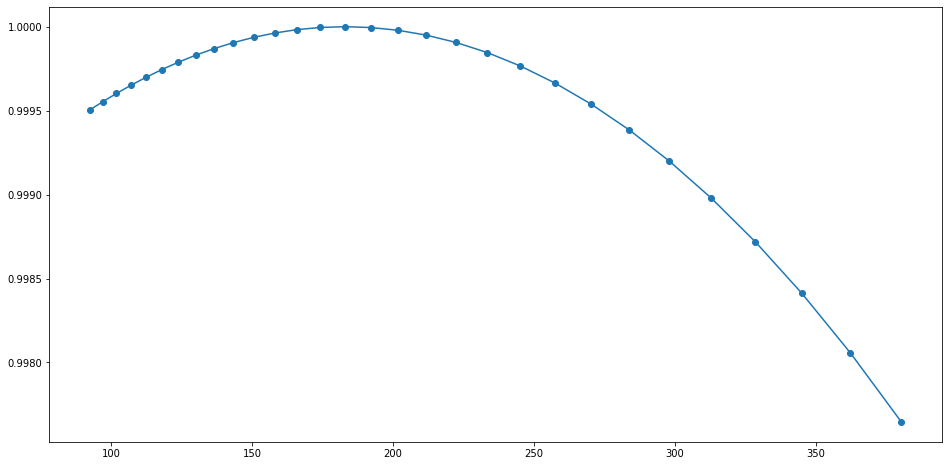

In [492]:
plt.figure(figsize=(16,8))
plt.plot(factor_scale * 183, f(factor_scale, 1., 1., std), marker='o')

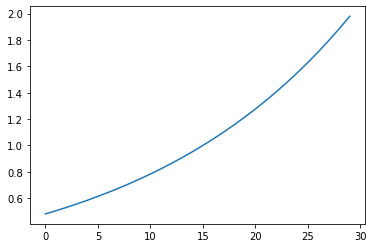

In [494]:
factor_scale = np.array([1.05**i for i in range(-15,15,1)])
plt.plot(factor_scale)

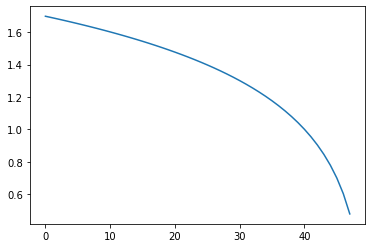

In [518]:
factor_scale = np.array([math.log(i,10) for i in range(50,2,-1)])
plt.plot(factor_scale)

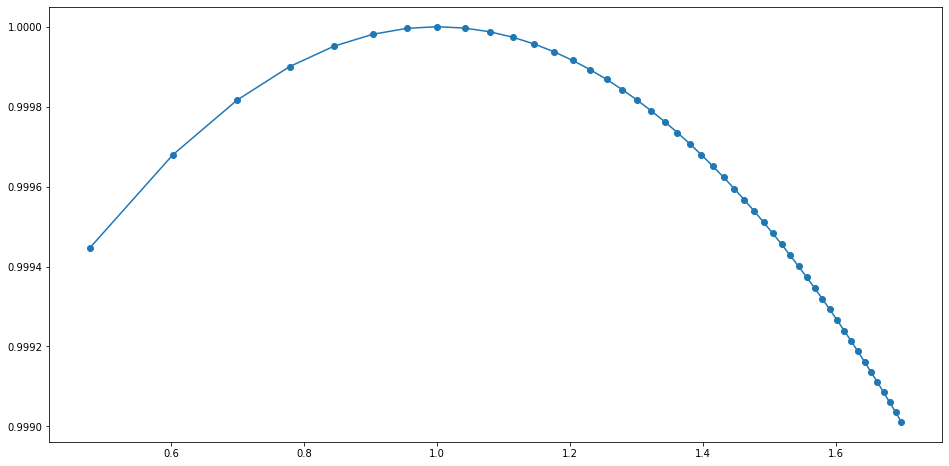

In [519]:
plt.figure(figsize=(16,8))
plt.plot(factor_scale, f(factor_scale, 1., 1., std), marker='o')

In [520]:
factor_scale

array([1.69897   , 1.69019608, 1.68124124, 1.67209786, 1.66275783,
       1.65321251, 1.64345268, 1.63346846, 1.62324929, 1.61278386,
       1.60205999, 1.59106461, 1.5797836 , 1.56820172, 1.5563025 ,
       1.54406804, 1.53147892, 1.51851394, 1.50514998, 1.49136169,
       1.47712125, 1.462398  , 1.44715803, 1.43136376, 1.41497335,
       1.39794001, 1.38021124, 1.36172784, 1.34242268, 1.32221929,
       1.30103   , 1.2787536 , 1.25527251, 1.23044892, 1.20411998,
       1.17609126, 1.14612804, 1.11394335, 1.07918125, 1.04139269,
       1.        , 0.95424251, 0.90308999, 0.84509804, 0.77815125,
       0.69897   , 0.60205999, 0.47712125])

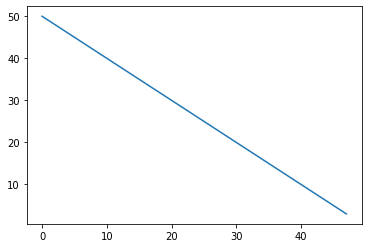

In [521]:
plt.plot(10**factor_scale)

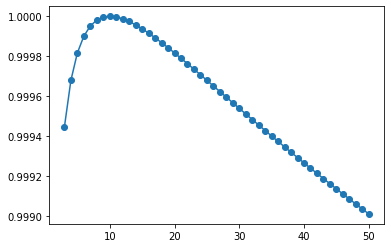

In [522]:
plt.plot(10**factor_scale, f(factor_scale, 1., 1., std), marker='o')

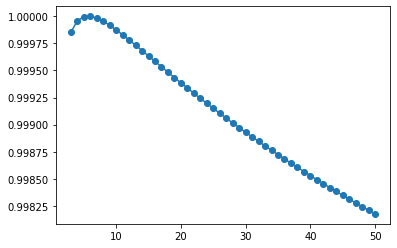

In [530]:
plt.plot(10**factor_scale, f(factor_scale, 1., 0.75, std), marker='o')

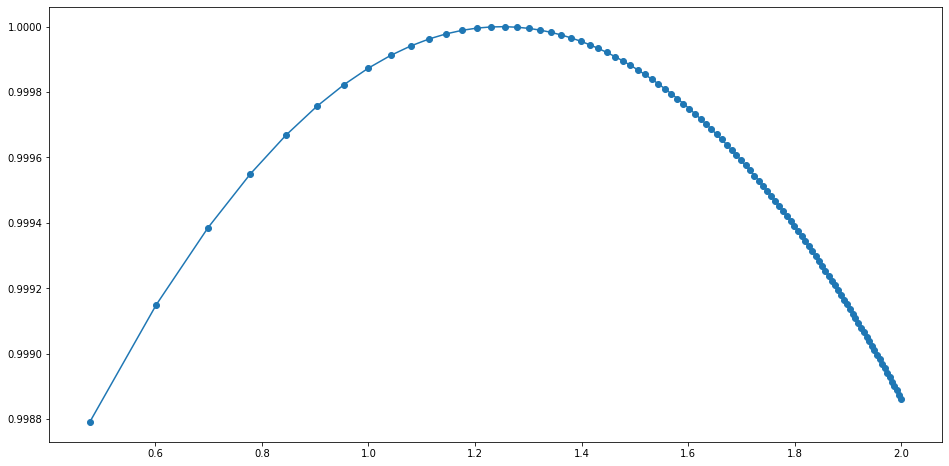

In [543]:
factor_scale = np.array([math.log(i,10) for i in range(100,2,-1)])
plt.figure(figsize=(16,8))
plt.plot(factor_scale, f(factor_scale, 1., 1.25, std), marker='o')

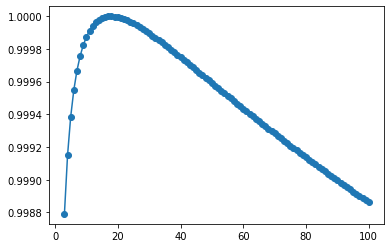

In [544]:
plt.plot(10**factor_scale, f(factor_scale, 1., 1.25, std), marker='o')

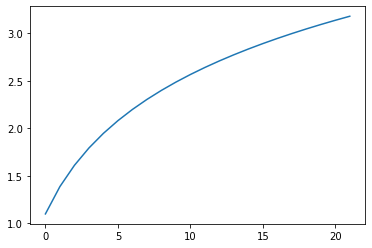

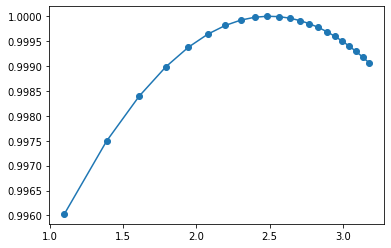

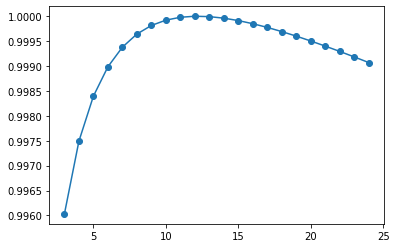

In [571]:
factor_scale = np.array([np.log(i) for i in range(3,50,1)])
plt.plot(factor_scale)
plt.figure()
# factor_scale = np.array([i for i in np.arange(5,-5,-0.5)])
# plt.figure(figsize=(16,8))
mean = 2.5
plt.plot(factor_scale, f(factor_scale, 1., mean, std), marker='o')
plt.figure()
plt.plot(np.exp(factor_scale), f(factor_scale, 1., mean, std), marker='o')

In [566]:
std

15.71250276097664

In [575]:
np.log(0.5)

-0.6931471805599453

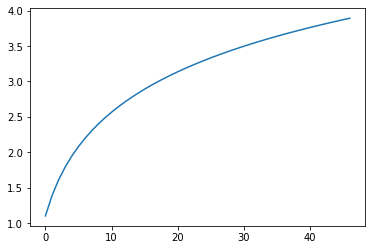

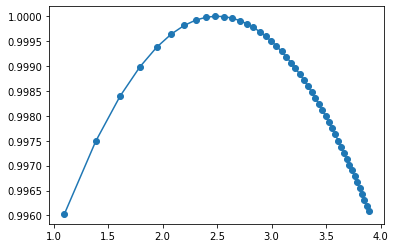

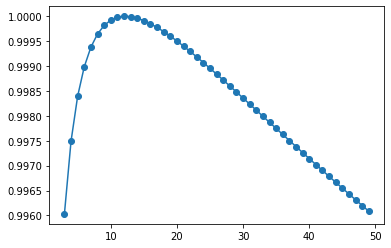

In [580]:
factor_scale = np.array([np.log(i) for i in np.arange(3,50,1)])
plt.plot(factor_scale)
plt.figure()
# factor_scale = np.array([i for i in np.arange(5,-5,-0.5)])
# plt.figure(figsize=(16,8))
mean = 2.5
plt.plot(factor_scale, f(factor_scale, 1., mean, std), marker='o')
plt.figure()
plt.plot(np.exp(factor_scale), f(factor_scale, 1., mean, std), marker='o')

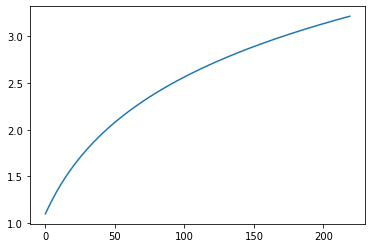

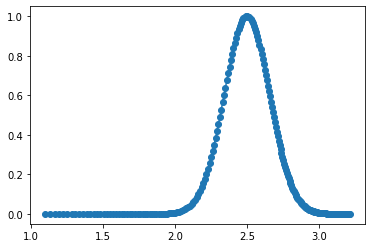

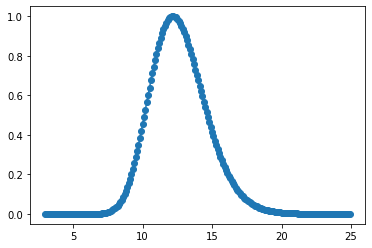

In [590]:
factor_scale = np.array([np.log(i) for i in np.arange(3,25,0.1)])
plt.plot(factor_scale)
plt.figure()
# factor_scale = np.array([i for i in np.arange(5,-5,-0.5)])
# plt.figure(figsize=(16,8))
mean = 2.5
plt.plot(factor_scale, f(factor_scale, 1., mean, std/100.), marker='o')
plt.figure()
plt.plot(np.exp(factor_scale), f(factor_scale, 1., mean, std/100.), marker='o')

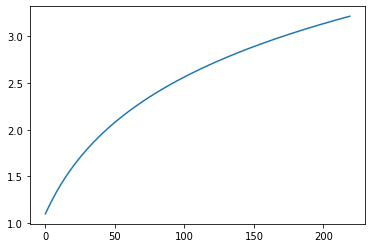

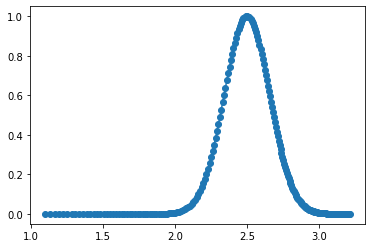

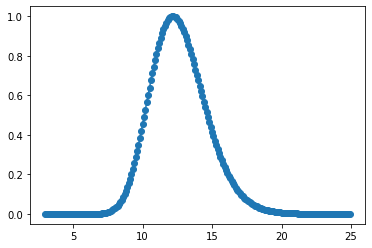

In [592]:
factor_scale = np.array([np.log(i) for i in np.arange(3,25,0.1)])
plt.plot(factor_scale)
plt.figure()
# factor_scale = np.array([i for i in np.arange(5,-5,-0.5)])
# plt.figure(figsize=(16,8))
mean = 2.5
plt.plot(factor_scale, f(factor_scale, 1., mean, std/100), marker='o')
plt.figure()
plt.plot(np.exp(factor_scale), f(factor_scale, 1., mean, std/100.), marker='o')

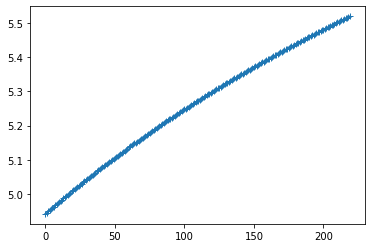

In [625]:
plt.plot(factor_scale, marker='+')

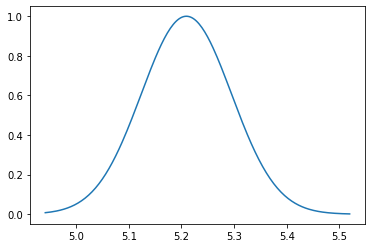

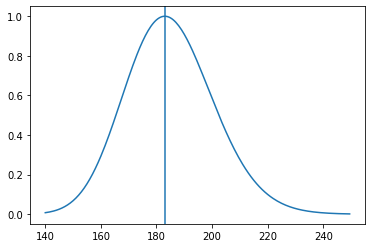

In [626]:
factor_scale = np.array([np.log(i) for i in np.arange(140,250,0.5)])
mean = np.log(183)
std = 15.7/183.
plt.plot(factor_scale, f(factor_scale, 1., mean, std))#, marker='o')
plt.figure()
plt.plot(np.exp(factor_scale), f(factor_scale, 1., mean, std))#, marker='o')
plt.axvline(183.)

In [623]:
AUC = f(factor_scale, 1., mean, std)
AUC_tot = np.sum(AUC)
cdf = np.cumsum(AUC)/AUC_tot
prob = cdf[np.where(np.exp(factor_scale) >= 210.4)[0][0]]
prob

0.9407646536035988

In [634]:
IV = 62
underlying = 183
std = IV/100. * underlying
std *= np.sqrt(7/365.)
std

15.71250276097664

0.9808567642752154

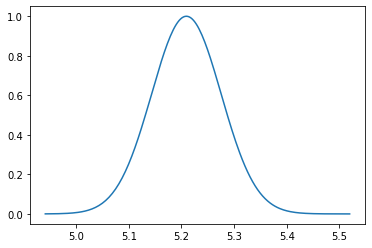

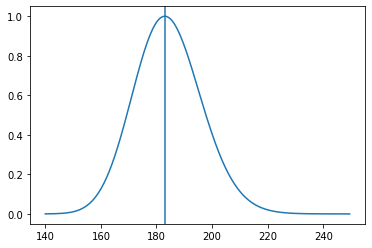

In [658]:
IV = 62 
IV /= 1.3
underlying = 183
std = IV/100. * underlying
std *= np.sqrt(7/365.)
# std

factor_scale = np.array([np.log(i) for i in np.arange(140,250,0.5)])
mean = np.log(183)
std = std/183.
plt.plot(factor_scale, f(factor_scale, 1., mean, std))#, marker='o')
plt.figure()
plt.plot(np.exp(factor_scale), f(factor_scale, 1., mean, std))#, marker='o')
plt.axvline(183.)

AUC = f(factor_scale, 1., mean, std)
AUC_tot = np.sum(AUC)
cdf = np.cumsum(AUC)/AUC_tot
prob = cdf[np.where(np.exp(factor_scale) >= 210.4)[0][0]]
prob

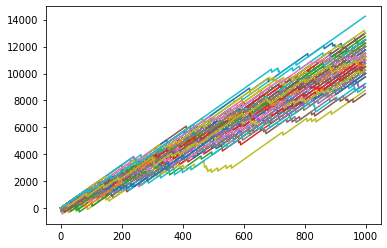

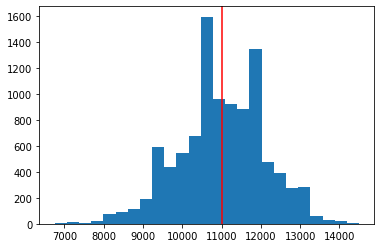

In [653]:
realizations = get_realizations(n_realizations = 10000, n_iterations=1000, profit_chance=0.98, credit=16)

linear: 0.9888482023045869
log: 0.9781304279845316
av prob: 0.9834893151445593


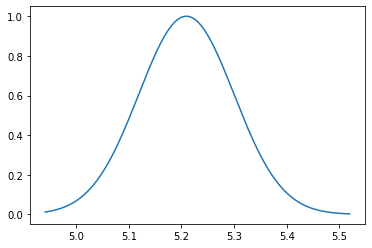

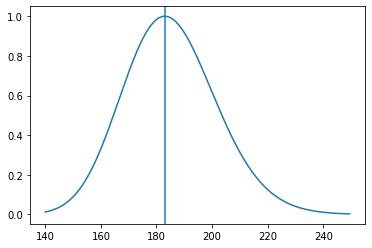

In [691]:
breakeven = 220.63
IV = 60
IV /= 1.3
underlying = 183
std = IV/100. * underlying
std *= np.sqrt(14/365.)
# std

stock_price = np.arange(115,245,0.1)
AUC = f(stock_price, 1., 183., std)
AUC_tot = np.sum(AUC)
cdf = np.cumsum(AUC)/AUC_tot
lin_prob = cdf[np.where(stock_price >= breakeven)[0][0]]
print(f'linear: {lin_prob}')

factor_scale = np.array([np.log(i) for i in np.arange(140,250,0.5)])
mean = np.log(183)
std = std/183.
plt.plot(factor_scale, f(factor_scale, 1., mean, std))#, marker='o')
plt.figure()
plt.plot(np.exp(factor_scale), f(factor_scale, 1., mean, std))#, marker='o')
plt.axvline(183.)

AUC = f(factor_scale, 1., mean, std)
AUC_tot = np.sum(AUC)
cdf = np.cumsum(AUC)/AUC_tot
log_prob = cdf[np.where(np.exp(factor_scale) >= breakeven)[0][0]]
print(f'log: {log_prob}')
print(f'av prob: {(lin_prob+log_prob)/2.}')

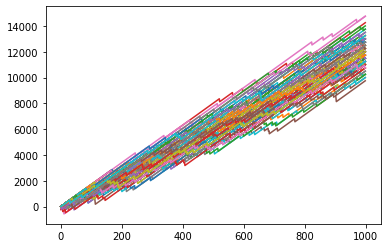

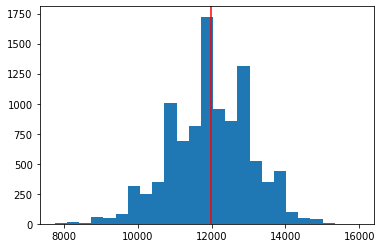

In [692]:
realizations = get_realizations(n_realizations = 10000, n_iterations=1000, profit_chance=0.98, credit=17)

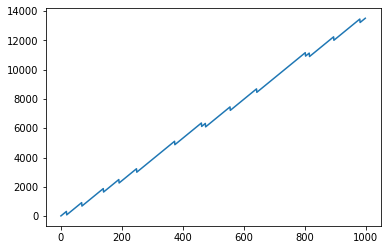

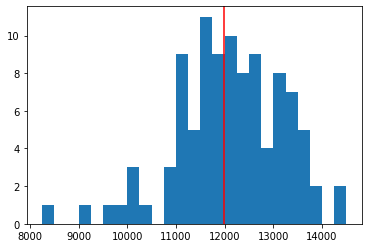

In [693]:
realizations = get_realizations(n_realizations = 10000, n_iterations=1000, profit_chance=0.98, credit=17)